In [487]:
# go to parent directory
%cd ..

/export/home/workspace


In [488]:
import random
from dataset import OpenImageDataset

In [489]:
from transformers import CLIPTokenizer

clip_tokenizer = CLIPTokenizer.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    subfolder="tokenizer",
)

In [508]:
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

open_image_dataset = OpenImageDataset(
    split="train",
    # split="validation",
    # save_after_filter=False,
    # load_cache=True,
    clip_tokenizer=clip_tokenizer,
    inp_bbox_transform=transforms.RandomResizedCrop(
                size=224,
                scale=(0.9, 1.0),
                interpolation=InterpolationMode.BICUBIC,
            ),
)
# open_image_dataset = OpenImageDataset()
print(len(open_image_dataset))

All labels: 291905
291905


In [509]:
open_image_dataset.cls_id2name

{'/m/011k07': 'Tortoise',
 '/m/011q46kg': 'Container',
 '/m/012074': 'Magpie',
 '/m/0120dh': 'Sea turtle',
 '/m/01226z': 'Football',
 '/m/012n7d': 'Ambulance',
 '/m/012w5l': 'Ladder',
 '/m/012xff': 'Toothbrush',
 '/m/012ysf': 'Syringe',
 '/m/0130jx': 'Sink',
 '/m/0138tl': 'Toy',
 '/m/013y1f': 'Organ (Musical Instrument)',
 '/m/01432t': 'Cassette deck',
 '/m/014j1m': 'Apple',
 '/m/014sv8': 'Human eye',
 '/m/014trl': 'Cosmetics',
 '/m/014y4n': 'Paddle',
 '/m/0152hh': 'Snowman',
 '/m/01599': 'Beer',
 '/m/01_5g': 'Chopsticks',
 '/m/015h_t': 'Human beard',
 '/m/015p6': 'Bird',
 '/m/015qbp': 'Parking meter',
 '/m/015qff': 'Traffic light',
 '/m/015wgc': 'Croissant',
 '/m/015x4r': 'Cucumber',
 '/m/015x5n': 'Radish',
 '/m/0162_1': 'Towel',
 '/m/0167gd': 'Doll',
 '/m/016m2d': 'Skull',
 '/m/0174k2': 'Washing machine',
 '/m/0174n1': 'Glove',
 '/m/0175cv': 'Tick',
 '/m/0176mf': 'Belt',
 '/m/017ftj': 'Sunglasses',
 '/m/018j2': 'Banjo',
 '/m/018p4k': 'Cart',
 '/m/018xm': 'Ball',
 '/m/01940j': 'Backpa

In [510]:
# without omitting
import pandas as pd

label_count = open_image_dataset.get_label_distribution()

with pd.option_context("display.max_rows", 1000):
    display(open_image_dataset.get_label_distribution())


Car                            19253
Building                       18694
House                          15850
Dog                             7453
Sculpture                       7119
Flower                          6621
Land vehicle                    5877
Cat                             5316
Boat                            5097
Food                            4883
Toy                             4752
Bird                            4446
Dress                           4433
Train                           3633
Airplane                        3633
Truck                           3628
Tower                           3496
Jacket                          3156
Bicycle                         3129
Guitar                          3110
Baked goods                     3030
Window                          2877
Bus                             2691
Skyscraper                      2573
Dessert                         2482
Animal                          2300
Horse                           2296
I

In [511]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

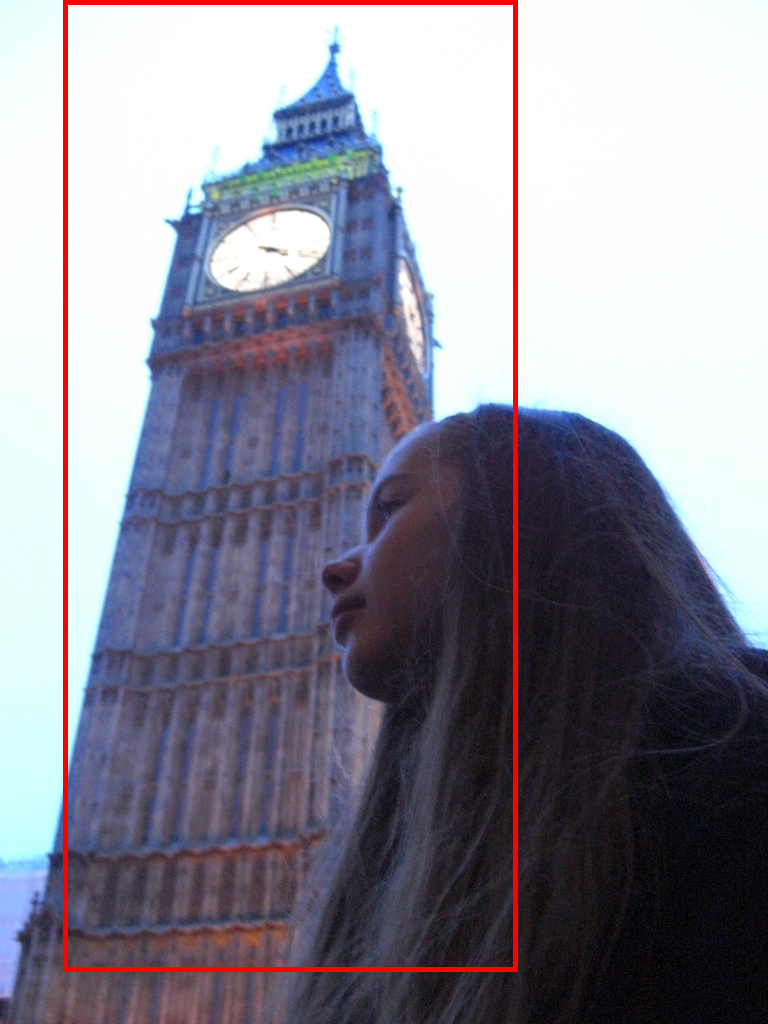

dict_keys(['image', 'input_image', 'target_image', 'bbox_image', 'bbox_input_image', 'bbox_target_image', 'image_id', 'instance_prompt_ids', 'ctx_begin_pos', 'label', 'caption', 'bbox', 'row'])
(768, 1024)
tower
(0.0825, 0.0, 0.673333, 0.94875)
ImageID        890c5cf93655c10d
Source                activemil
LabelName             /m/01fdzj
Confidence                    1
XMin                     0.0825
XMax                   0.673333
YMin                          0
YMax                    0.94875
IsOccluded                    0
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
XClick1X                     -1
XClick2X                     -1
XClick3X                     -1
XClick4X                     -1
XClick1Y                     -1
XClick2Y                     -1
XClick3Y                     -1
XClick4Y                     -1
LabelString               Tower
Name: 168698, dtype: object


In [512]:
idx = random.randint(0, len(open_image_dataset))

sample = open_image_dataset[idx]

image, label, bbox = sample["image"], sample["label"], sample["bbox"]

w, h = image.size

# draw bounding box on image
xmin, ymin, xmax, ymax = bbox
image = image.copy()

from PIL import ImageDraw, ImageFont
draw = ImageDraw.Draw(image)
draw.rectangle([xmin * w, ymin * h, xmax * w, ymax * h], outline="red", width=5)

image.show()
print(sample.keys())
print(image.size)
print(label)
print(bbox)
print(sample["row"])

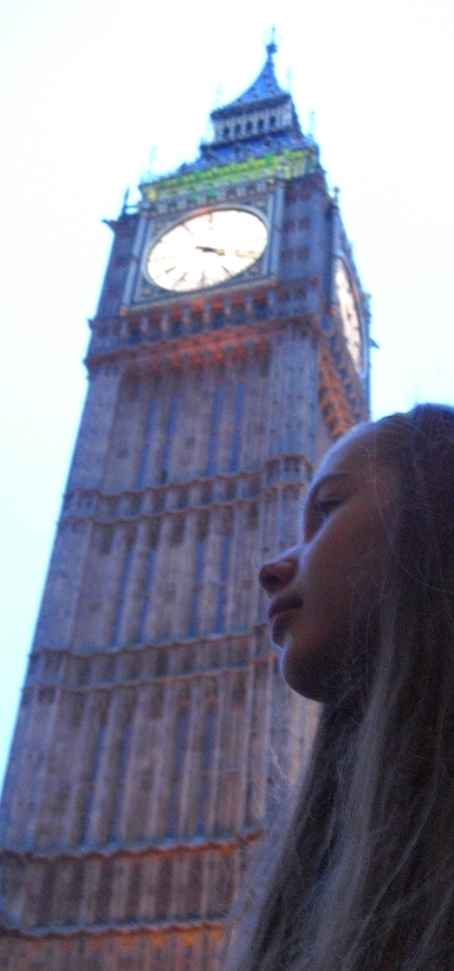

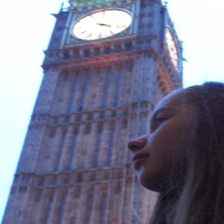

a tower, girl looking up and to the sky with big ben towering behind, the tower is


In [513]:
display(sample["bbox_image"])
display(sample["bbox_input_image"])
print(sample["caption"])

In [514]:
# show all rows with ImageID == sample["row"]["ImageID"]
open_image_dataset.annotations[open_image_dataset.annotations["ImageID"] == sample["row"]["ImageID"]]

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,LabelString
168698,890c5cf93655c10d,activemil,/m/01fdzj,1,0.0825,0.673333,0.0000,0.94875,0,0,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Tower
168699,890c5cf93655c10d,activemil,/m/079cl,1,0.0775,0.665833,0.0325,0.94000,1,1,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Skyscraper


In [515]:
inputs = processor(text=sample["label"], images=sample["image"], padding="max_length", return_tensors="pt")

<ipython-input-516-040501d35e48>:14: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  PIL_image = PIL_image.resize(orig_size, Image.BICUBIC)


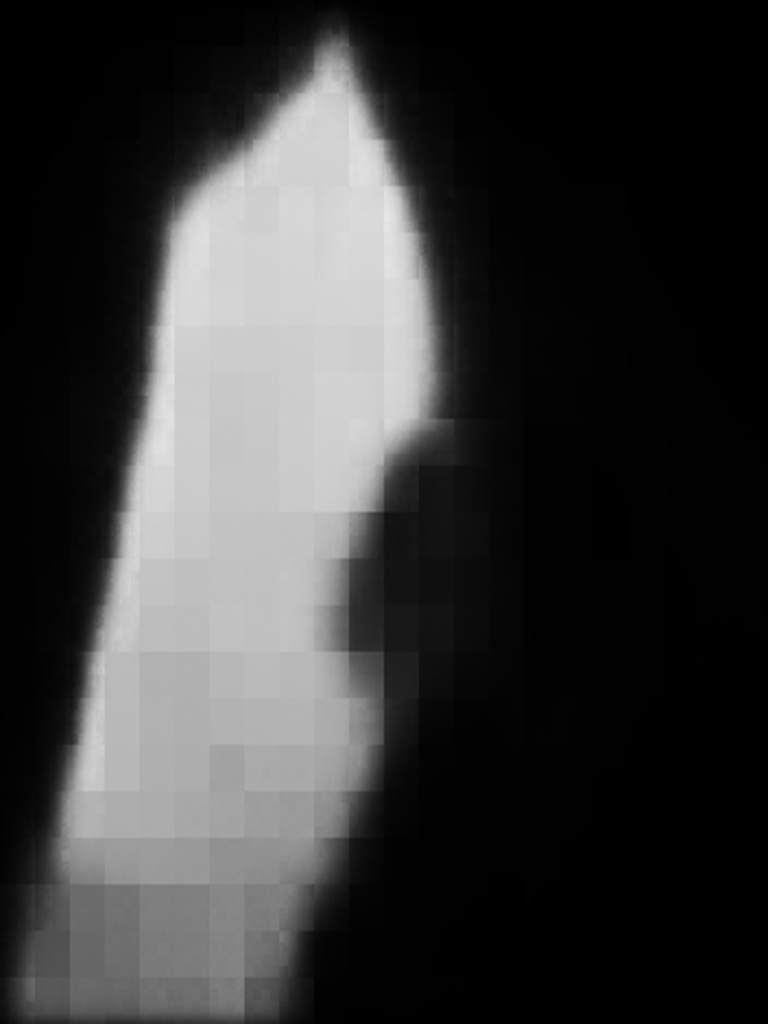

In [516]:
import torch
import matplotlib.pyplot as plt

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

import numpy as np
from PIL import Image
PIL_image = Image.fromarray(np.uint8((torch.sigmoid(preds[:, 0, :]) * 255).numpy())).convert('RGB')
orig_size = (sample["image"].size[0], sample["image"].size[1])
PIL_image = PIL_image.resize(orig_size, Image.BICUBIC)
display(PIL_image)

In [523]:
import os
from PIL import Image

# tgt_image_id = "0000333f08ced1cd"
# tgt_image_id = "0000bf2838ee5aeb"
# tgt_image_id = "0001a2f47097ee27"
# tgt_image_id = "00021a200ea0bd61"
# tgt_image_id = "0003163b234fa2fd"
# tgt_image_id = "0003d828877c9807"
# tgt_image_id = "0005b1433f0127a0"
# tgt_image_id = "0006fbc76c1f64f8"
# tgt_image_id = "0001f65de725a86"
# tgt_image_id = "0003a1857fd3f45b"
# tgt_image_id = "00043e7c5c4c025a"
# tgt_image_id = "1186808f30c8be20"
# tgt_image_id = "0049005b0f5eeb57"
# tgt_image_id = "0f2d839d6805d7d"
# tgt_image_id = "1773ef49f38531a9"
# tgt_image_id = "044a3e7c7b006202"
# tgt_image_id = "050e8ca25cd35ba5"
tgt_image_id = "568c7a2d8bb0a638"

# # view sample by image ID
tgt_sample = open_image_dataset.annotations[open_image_dataset.annotations["ImageID"] == tgt_image_id]
display(tgt_sample)


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,LabelString
113335,568c7a2d8bb0a638,xclick,/m/0bt9lr,1,0.124,0.836,0.106071,0.857905,1,0,...,0,0.575,0.124,0.564,0.836,0.106071,0.282855,0.857905,0.350901,Dog


In [524]:
tgt_sample["ImageID"].values[0]

'568c7a2d8bb0a638'

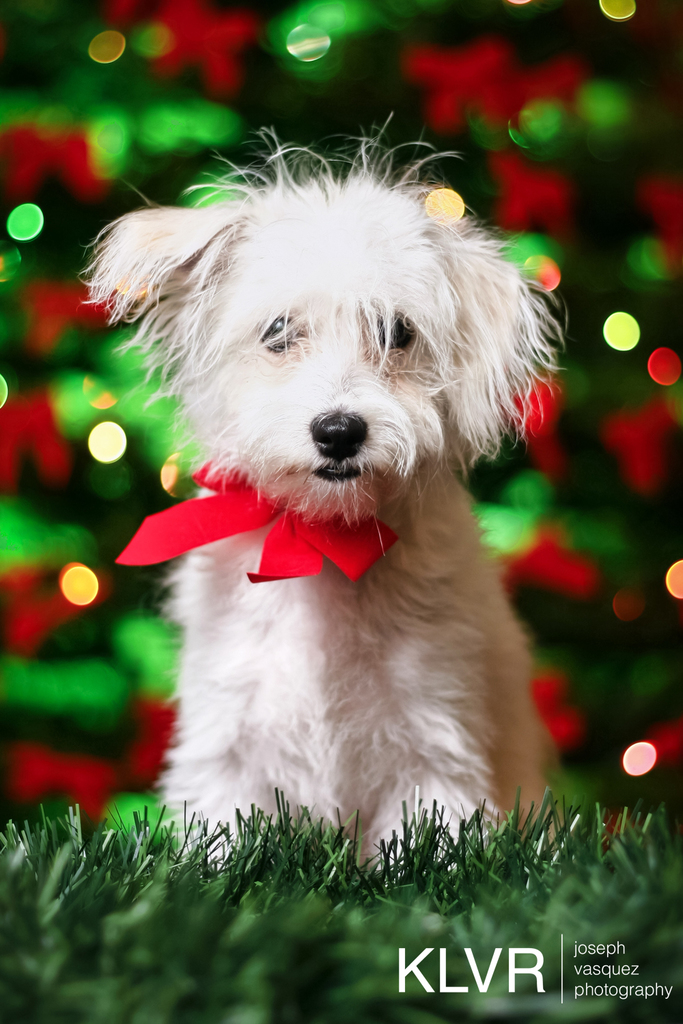

In [525]:
image_path = os.path.join(open_image_dataset.imagedir_path, tgt_sample["ImageID"].values[0] + ".jpg")
image = Image.open(image_path).convert("RGB")

display(image)